<a href="https://colab.research.google.com/github/IanWills03/Computational-Intelligence-Assessment/blob/main/Comp_Assessment_Part_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part D - Preparing and building an ANN using External Libraries**




Step 1 - Prepare the Dataset using SKLEARN

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Mount Google Drive (for Google Colab users)
drive.mount('/content/drive')

with open('/content/drive/MyDrive/Comp_Intelligence_Data_Sets/house-votes-84.names', 'r') as file:
    content = file.read()

column_names = ['class_name', 'handicapped-infants', 'water-project-cost-sharing',
                'adoption-of-the-budget-resolution', 'physician-fee-freeze',
                'el-salvador-aid', 'religious-groups-in-schools',
                'anti-satellite-test-ban', 'aid-to-nicaraguan-contras',
                'mx-missile', 'immigration', 'synfuels-corporation-cutback',
                'education-spending', 'superfund-right-to-sue', 'crime',
                'duty-free-exports', 'export-administration-act-south-africa']

df = pd.read_csv('/content/drive/MyDrive/Comp_Intelligence_Data_Sets/house-votes-84.data',
                 header=None, names=column_names)


df.replace('?', np.nan, inplace=True)
label_encoder = LabelEncoder()
df['class_name'] = label_encoder.fit_transform(df['class_name'])
df.replace({'y': 1, 'n': 0}, inplace=True)
df = df.apply(lambda x: x.fillna(x.mode()[0]))

# Split dataset into training and test sets (80% train, 20% test)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
X_train = train_df.drop(columns=['class_name']).values
y_train = train_df['class_name'].values
X_test = test_df.drop(columns=['class_name']).values
y_test = test_df['class_name'].values

# Print dataset shape and class label distribution
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")
print("\nClass distribution in training set:")
print(train_df['class_name'].value_counts())

print("\nClass distribution in test set:")
print(test_df['class_name'].value_counts())
df

Mounted at /content/drive
Training set: (348, 16), Test set: (87, 16)

Class distribution in training set:
class_name
0    211
1    137
Name: count, dtype: int64

Class distribution in test set:
class_name
0    56
1    31
Name: count, dtype: int64


<ipython-input-1-9ca37dd624bc>:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'y': 1, 'n': 0}, inplace=True)


,class_name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
431,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
432,1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
433,1,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0


Part 2 - Building the ANN using tensorflow

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



🔍 DEBUGGING INFO:
X_train shape: (348, 16), X_test shape: (87, 16)
y_train shape: (348,), y_test shape: (87,)
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

🎯 Example Predictions:
Sample 1: Actual: Republican | Predicted: Republican (Confidence: 0.15)
Sample 2: Actual: Republican | Predicted: Republican (Confidence: 0.00)
Sample 3: Actual: Democrat | Predicted: Democrat (Confidence: 1.00)
Sample 4: Actual: Democrat | Predicted: Democrat (Confidence: 0.97)
Sample 5: Actual: Democrat | Predicted: Democrat (Confidence: 0.64)
Sample 6: Actual: Democrat | Predicted: Democrat (Confidence: 0.97)
Sample 7: Actual: Republican | Predicted: Republican (Confidence: 0.01)
Sample 8: Actual: Democrat | Predicted: Democrat (Confidence: 1.00)
Sample 9: Actual: Republican | Predicted: Democrat (Confidence: 0.53)
Sample 10: Actual: Democrat | Predicted: Democrat (Confidence: 0.97)

❌ Incorrect Predictions:
Sample 9: Actual: Republican | Predicted: Democrat (Confidence: 0.53)
Sample 12: Actual: Republican | Pred

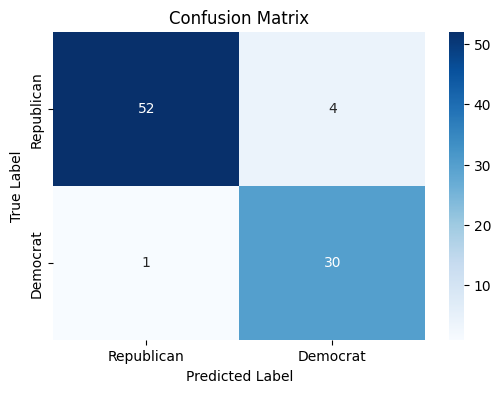

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

model = Sequential([
    Dense(16, activation='relu', input_shape=(16,), use_bias=True),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test), verbose=0)

print("\n🔍 DEBUGGING INFO:")
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)


print("\n🎯 Example Predictions:")
for i in range(10):
    actual = "Democrat" if y_test[i] == 1 else "Republican"
    predicted = "Democrat" if y_pred[i] == 1 else "Republican"
    probability = y_pred_probs[i][0]

    print(f"Sample {i+1}: Actual: {actual} | Predicted: {predicted} (Confidence: {probability:.2f})")


print("\n❌ Incorrect Predictions:")
incorrect_indices = np.where(y_test != y_pred.reshape(-1))[0]
for i in incorrect_indices[:10]:
    actual = "Democrat" if y_test[i] == 1 else "Republican"
    predicted = "Democrat" if y_pred[i] == 1 else "Republican"
    probability = y_pred_probs[i][0]

    print(f"Sample {i+1}: Actual: {actual} | Predicted: {predicted} (Confidence: {probability:.2f})")


final_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"\n✅ Final Model Accuracy: {final_acc:.2%}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Republican', 'Democrat'], yticklabels=['Republican', 'Democrat'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
